# This is a test file to the Freecodecamp Data Analysis Project

<h4>TASK 1: Load the Data</h4>

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('medical_examination.csv')
df.head()



,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


<h4> TASK 2: Transform the Data</h4>

<dl>

<dt><b>Prepare the Data</b> </dt>
<ol><dd>

<li>Create a chart similar to examples/Figure_1.png, where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels.</li><br>

<li>By each number in the medical_data_visualizer.py file, add the code from the associated instruction number below.</li><br>
    
<li>Import the data from medical_examination.csv and assign it to the df variable.</li><br>

<li>Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.</li><br>

<li>Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.</li><br>

</dd></ol>
</dl>


In [73]:
df['height'] = df['height']/100
df['bmi'] = round((df['weight']/(df['height'])**2), 2)
df['overweight'] = [1 if x > 25 else 0 for x in df['bmi']]
df['cholesterol'] = [0 if x <= 1 else 1 for x in df['cholesterol']]
df['gluc'] = [0 if x <= 1 else 1 for x in df['gluc']]


<h4>TASK 3: Prepare the Data For Plotting</h4>

<dl>

<dt><b>Draw the Categorical Plot in the draw_cat_plot function.</b></dt>

<ol><dd>

<li>Create a DataFrame for the cat plot using pd.melt with values from cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.</li><br>

<li>Group and reformat the data in df_cat to split it by cardio. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.</li><br>

<li>Convert the data into long format and create a chart that shows the value counts of the categorical features using the following method provided by the seaborn library import: sns.catplot().</li><br>

<li>Get the figure for the output and store it in the fig variable.
Do not modify the next two lines.</li><br>

</dd></ol>

</dl>

   cardio variable  value
0       0   active      1
1       1   active      1
2       1   active      0
3       1   active      1
4       0   active      0


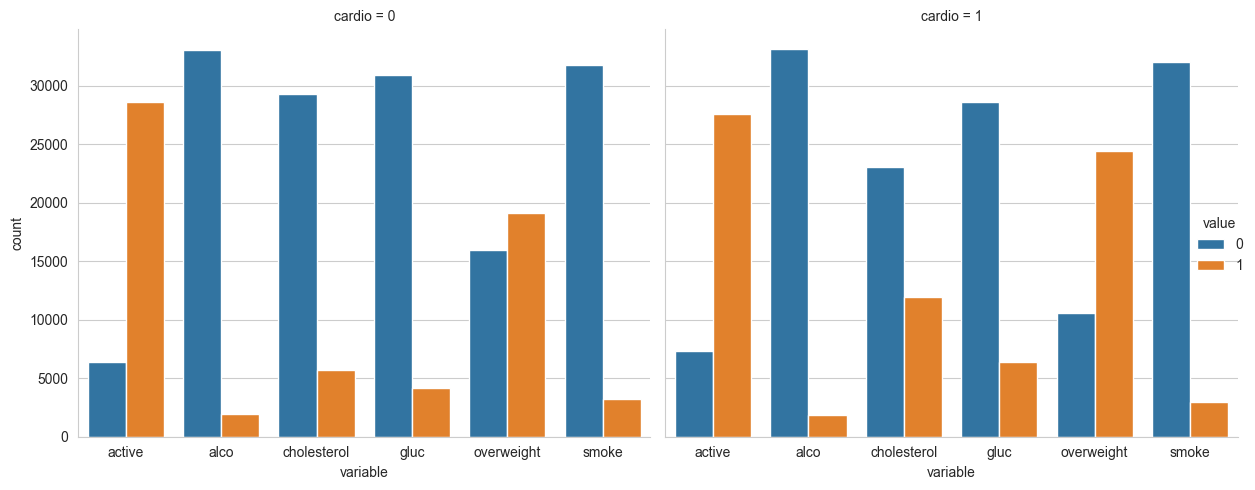

In [74]:
# Select the variables you want to plot
variables = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke']

# Melt the DataFrame to long format
df_melted = df.melt(id_vars='cardio', value_vars=variables, var_name='variable', value_name='value')

print(df_melted.head())
# Create a grouped bar plot using catplot
sns.catplot(
    data=df_melted,
    x='variable', y=None,
    hue='value', col='cardio',
    kind='count', height=5, aspect=1.2
)

plt.tight_layout()
plt.show()

<h4>TASK 4: Find the relationships between two or more Categorical Variables</h4>

<dl>

<dt><b>Draw the Heat Map in the draw_heat_map function.</b></dt>

<ol><dd>

<li>Clean the data in the df_heat variable by filtering out the following patient segments that represent incorrect data:</li>

<ul>
  <li style="margin-left: 10px;">diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))</li><br>
  <li style="margin-left: 10px;">height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))</li><br>
  <li style="margin-left: 10px;">height is more than the 97.5th percentile</li><br>
  <li style="margin-left: 10px;">weight is less than the 2.5th percentile</li><br>
  <li style="margin-left: 10px;">weight is more than the 97.5th percentile</li><br>
</ul>


<li>Calculate the correlation matrix and store it in the corr variable.</li><br>

<li>Generate a mask for the upper triangle and store it in the mask variable.</li><br>

<li>Set up the matplotlib figure.</li><br>

<li>Plot the correlation matrix using the method provided by the seaborn library import: sns.heatmap(). Do not modify the next two lines.</li><br>
</ol>
</dl>

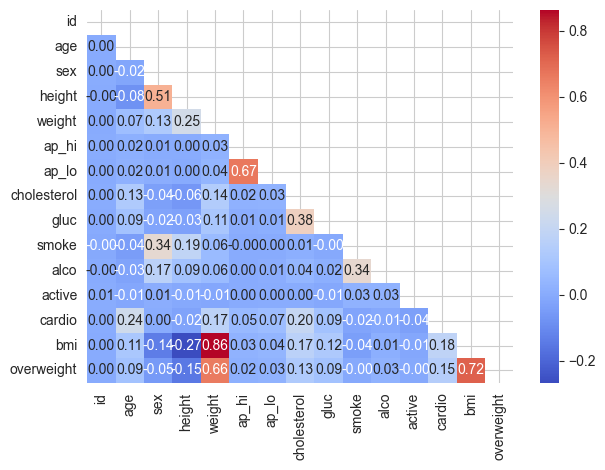

<Figure size 640x480 with 0 Axes>

In [76]:
# Task 1: Filter the Data

df['ap_lo'] = [x  if x > y else y for x, y in zip(df['ap_lo'], df['ap_hi']) ]
lower_height, upper_height = df['height'].quantile([0.025, 0.975])
lower_weight, upper_weight = df['weight'].quantile([0.025, 0.975])

df_heat = df.loc[(df['height'].between(lower_height, upper_height)) & 
                 (df['weight'].between(lower_weight, upper_weight))]
corr = df_heat.corr()
df.head()

# Task 2: Create the Correlation  Matrix
mk = np.triu(np.ones_like(corr, dtype=bool))
mask = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm', annot=True, fmt='.2f', mask=mk)
plt.tight_layout()


# Task 3: Diplay the Matrix and save it
plt.show()
fig, ax = plt.subplots()
plt.clf()


<dl>

<dt><b>Development</b></dt>

<p style="margin-left: 30px;">Write your code in medical_data_visualizer.py. For development, you can use main.py to test your code.</p><br>
<br><br>
<dt><b>Testing</b></dt>
<p style="margin-left: 30px;">The unit tests for this project are in test_module.py. We imported the tests from test_module.py to main.py for your convenience.</p><br>
<br><br>
<dt><b>Submitting</b></dt>
<p style="margin-left: 30px;">Copy your project's URL and submit it to freeCodeCamp.</p><br>
</dl>